In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Download dataset

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("large_text_dataset.csv")

# Предположим, что у нас есть колонка 'text' с текстовыми данными
documents = df['text'].dropna().tolist()

Saving large_text_dataset.csv to large_text_dataset (1).csv


In [3]:
import re
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

processed_text = [preprocess_text(text) for text in documents]
print("Prossed Text:")
print(processed_text[:3])

Prossed Text:
[['stock', 'market', 'showed', 'significant', 'growth', 'today', 'reaching', 'new', 'high'], ['movie', 'wa', 'absolutely', 'fantastic', 'actor', 'delivered', 'outstanding', 'performance'], ['researcher', 'discovered', 'new', 'specie', 'bacteria', 'break', 'plastic']]


In [4]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

processed_sentences_nltk = [preprocess_text(doc) for doc in documents]

# Train Word2Vec model
model_cbow = Word2Vec(processed_sentences_nltk, vector_size=100, window=5, min_count=2, sg=0)  # CBOW
model_skipgram = Word2Vec(processed_sentences_nltk, vector_size=100, window=5, min_count=2, sg=1)  # Skip-gram
print("Model Word2Vec trained.")

Model Word2Vec trained.


In [5]:
import gensim.downloader as api

# Train GloVe model
glove_model = api.load("glove-wiki-gigaword-50")
print("Model GloVe trained.")

Model GloVe trained.


In [6]:
from gensim.models import FastText

# Train FastText model
model_fasttext = FastText(processed_sentences_nltk, vector_size=100, window=5, min_count=1)
print("Model FastText trained.")

Model FastText trained.


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import random

def cosine_similarity_random(model, is_glove=False):
    words = list(model.wv.key_to_index.keys()) if not is_glove else list(model.key_to_index.keys())
    word1, word2 = random.sample(words, 2)
    vec1 = model[word1] if is_glove else model.wv[word1]
    vec2 = model[word2] if is_glove else model.wv[word2]
    similarity = cosine_similarity([vec1], [vec2])[0][0]
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")

print("Word2Vec CBOW:")
cosine_similarity_random(model_cbow)
print("FastText:")
cosine_similarity_random(model_fasttext)
print("GloVe:")
cosine_similarity_random(glove_model, is_glove=True)

Word2Vec CBOW:
Cosine similarity between 'trend' and 'boost': 0.9695158004760742
FastText:
Cosine similarity between 'developing' and 'believe': 0.9984334111213684
GloVe:
Cosine similarity between 'propontis' and '1,482': 0.24317124485969543


<ipython-input-8-83c20861a8f3>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', cmap='coolwarm')


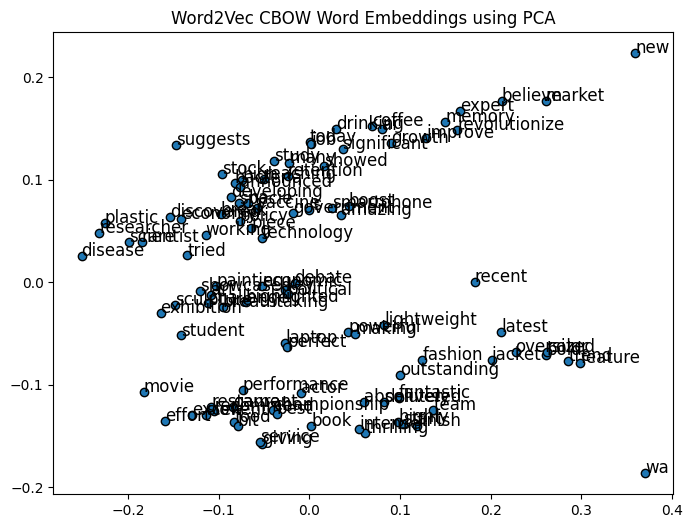

<ipython-input-8-83c20861a8f3>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', cmap='coolwarm')


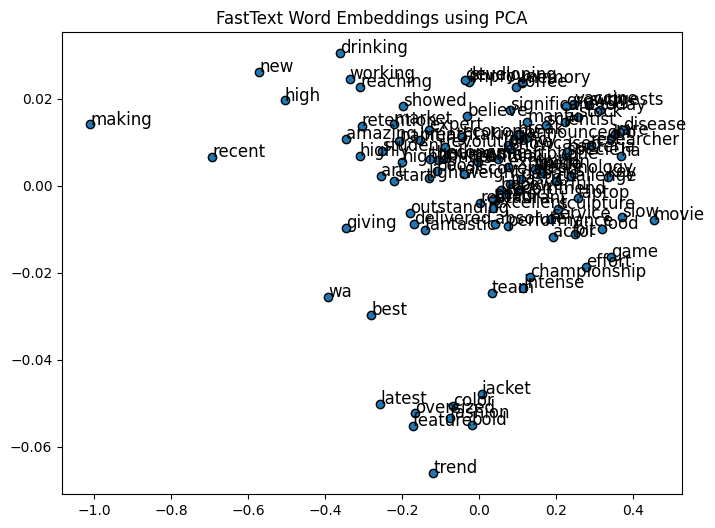

<ipython-input-8-83c20861a8f3>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', cmap='coolwarm')


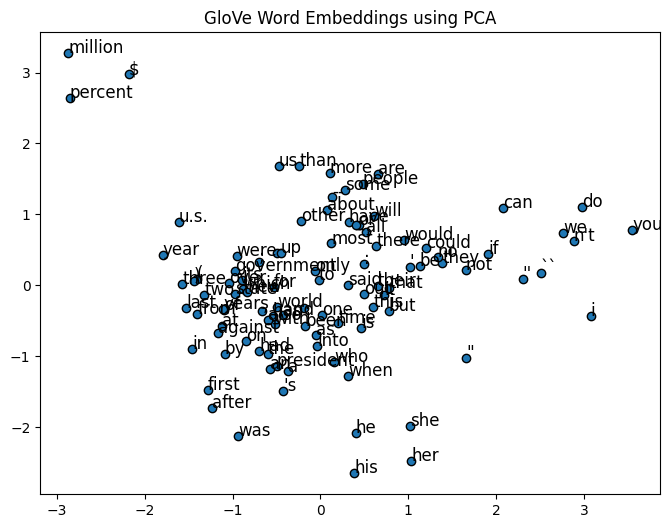

<ipython-input-8-83c20861a8f3>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', cmap='coolwarm')


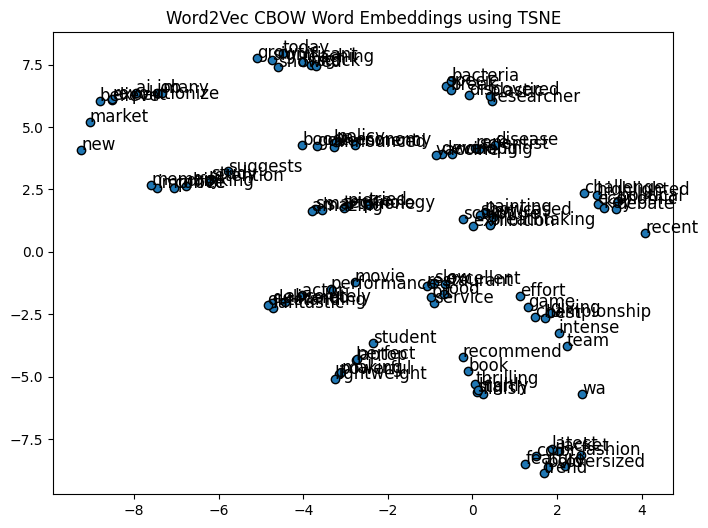

<ipython-input-8-83c20861a8f3>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', cmap='coolwarm')


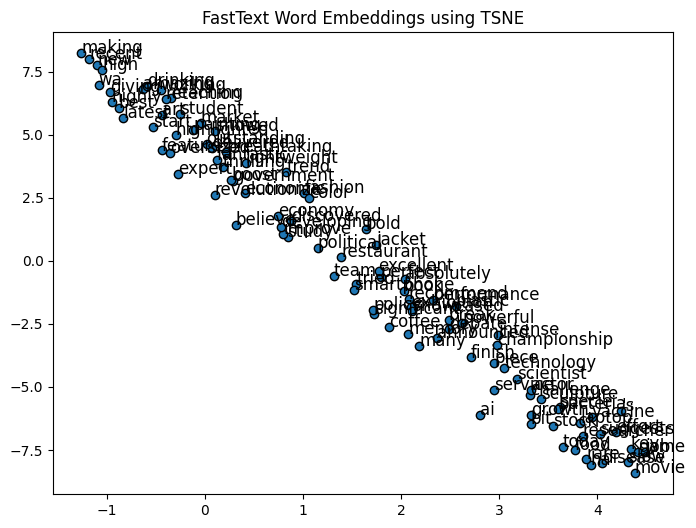

<ipython-input-8-83c20861a8f3>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', cmap='coolwarm')


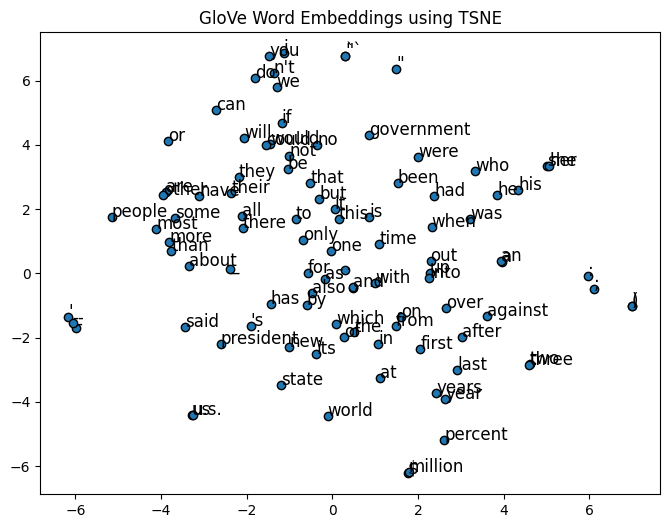

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_embeddings(model, title, method='PCA', is_glove=False):
    words = list(model.wv.key_to_index.keys())[:100] if not is_glove else list(model.key_to_index.keys())[:100]
    vectors = np.array([model.wv[word] for word in words]) if not is_glove else np.array([model[word] for word in words])

    #метод уменьшения размерности
    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 'TSNE':
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
    else:
        raise ValueError("Method should be 'PCA' or 'TSNE'")

    reduced_vectors = reducer.fit_transform(vectors) #уменьшение размерности (Преобразуем вектора из 100D → 2D)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', cmap='coolwarm')

    for word, (x, y) in zip(words, reduced_vectors): #для подписи слов
        plt.text(x, y, word, fontsize=12)

    plt.title(f"{title} using {method}")
    plt.show()

# Визуализация для Word2Vec CBOW, FastText и GloVe с PCA и t-SNE
plot_embeddings(model_cbow, "Word2Vec CBOW Word Embeddings", method='PCA')
plot_embeddings(model_fasttext, "FastText Word Embeddings", method='PCA')
plot_embeddings(glove_model, "GloVe Word Embeddings", method='PCA', is_glove=True)
plot_embeddings(model_cbow, "Word2Vec CBOW Word Embeddings", method='TSNE')
plot_embeddings(model_fasttext, "FastText Word Embeddings", method='TSNE')
plot_embeddings(glove_model, "GloVe Word Embeddings", method='TSNE', is_glove=True)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(None, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)
max_len = max(map(len, sequences))
X = pad_sequences(sequences, maxlen=max_len)

# Генерация случайных меток (положительные/отрицательные)
y = np.random.randint(2, size=(len(X),))

model_rnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Task2.2:

In [11]:
history = model_rnn.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5061 - loss: 0.7180 - val_accuracy: 0.5267 - val_loss: 0.6952
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5152 - loss: 0.6932 - val_accuracy: 0.5733 - val_loss: 0.6836
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5435 - loss: 0.6930 - val_accuracy: 0.4867 - val_loss: 0.6969
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5073 - loss: 0.6968 - val_accuracy: 0.5333 - val_loss: 0.6850
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5405 - loss: 0.6894 - val_accuracy: 0.5800 - val_loss: 0.6824
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5405 - loss: 0.6887 - val_accuracy: 0.5067 - val_loss: 0.7010
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5177 - loss: 0.6960 - val_accuracy: 0.5200 - val_loss: 0.6922
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5433 - loss: 0.6886 - val_accuracy: 0.5667 - v

Task2.3:

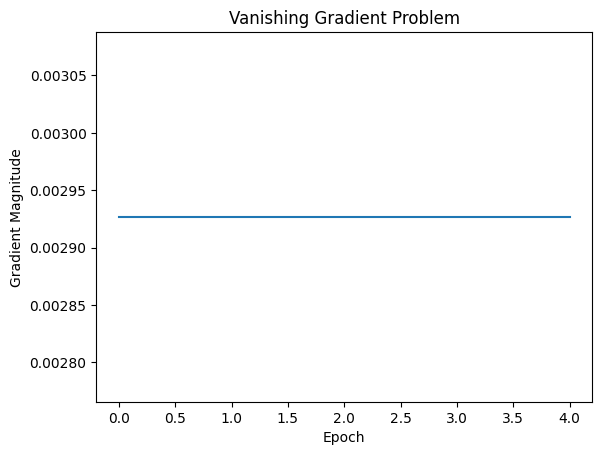

In [12]:
gradients = []
for epoch in range(5):
    with tf.GradientTape() as tape:
        y_pred = model_rnn(X, training=True)
        # Reshape y_pred to match the shape of y
        y_pred = tf.reshape(y_pred, [-1]) # Reshape to (1500,)
        loss = tf.keras.losses.binary_crossentropy(y, y_pred)
    grads = tape.gradient(loss, model_rnn.trainable_variables)
    gradients.append(np.mean([tf.reduce_mean(tf.abs(g)).numpy() for g in grads]))

plt.plot(range(5), gradients)
plt.xlabel("Epoch")
plt.ylabel("Gradient Magnitude")
plt.title("Vanishing Gradient Problem")
plt.show()

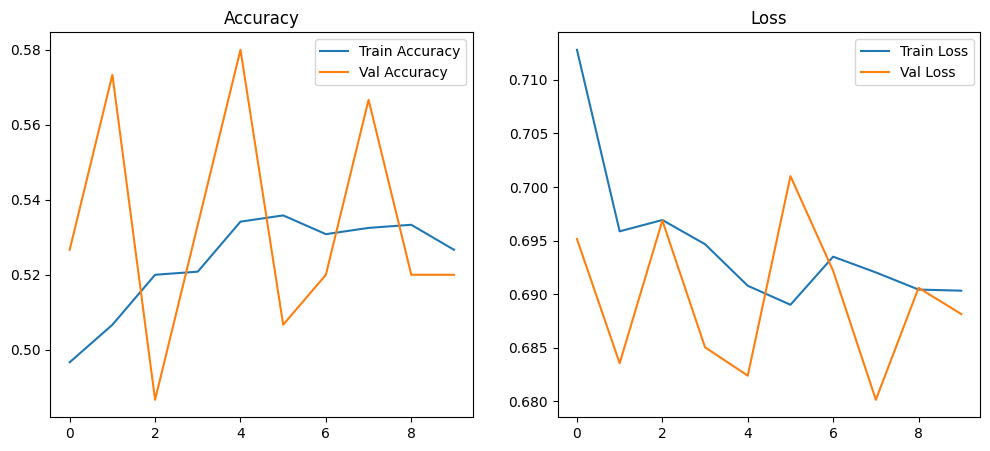

In [13]:
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)

Task 3 LSTM vs. GRU for Text Classification

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=256, input_length=max_len),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(input_dim=10000, output_dim=256, input_length=max_len),
    GRU(128, input_shape=(100, 1), return_sequences=True),
    GRU(64),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_lstm = model_lstm.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.5050 - loss: 0.6937 - val_accuracy: 0.5733 - val_loss: 0.6873
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.4844 - loss: 0.6934 - val_accuracy: 0.5800 - val_loss: 0.6847
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5310 - loss: 0.6912 - val_accuracy: 0.5667 - val_loss: 0.6857
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5185 - loss: 0.6902 - val_accuracy: 0.5600 - val_loss: 0.6872
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5241 - loss: 0.6923 - val_accuracy: 0.5667 - val_loss: 0.6863
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.5165 - loss: 0.6933 - val_accuracy: 0.5667 - val_loss: 0.6863
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5383 - loss: 0.6892 - val_accuracy: 0.5333 - val_loss: 0.6887
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.5410 - loss: 0.6883 - val_accuracy: 0.5333 

In [17]:
history_gru = model_gru.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.4961 - loss: 0.6965 - val_accuracy: 0.5667 - val_loss: 0.6882
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.5328 - loss: 0.6910 - val_accuracy: 0.5667 - val_loss: 0.6853
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5405 - loss: 0.6900 - val_accuracy: 0.5400 - val_loss: 0.6899
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.5210 - loss: 0.6914 - val_accuracy: 0.5333 - val_loss: 0.6858
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5425 - loss: 0.6888 - val_accuracy: 0.5333 - val_loss: 0.6891
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5431 - loss: 0.6904 - val_accuracy: 0.5533 - val_loss: 0.6863
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5326 - loss: 0.6910 - val_accuracy: 0.5200 - val_loss: 0.6883
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5618 - loss: 0.6867 - val_accuracy: 0.5600 

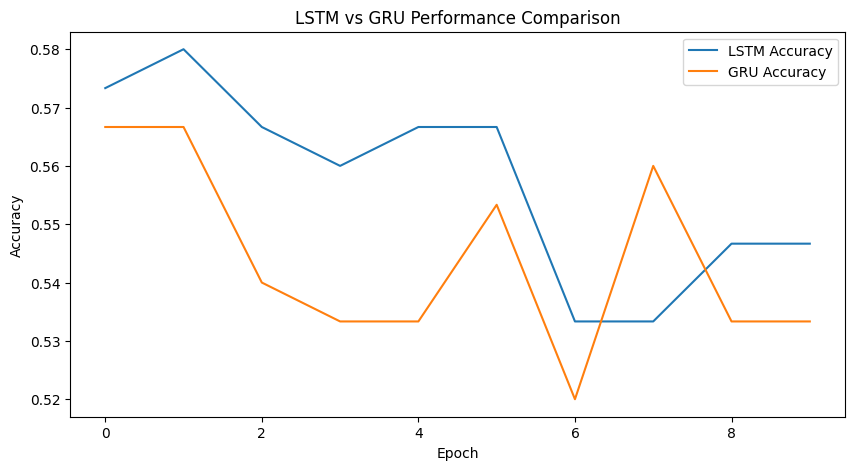

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("LSTM vs GRU Performance Comparison")
plt.show()

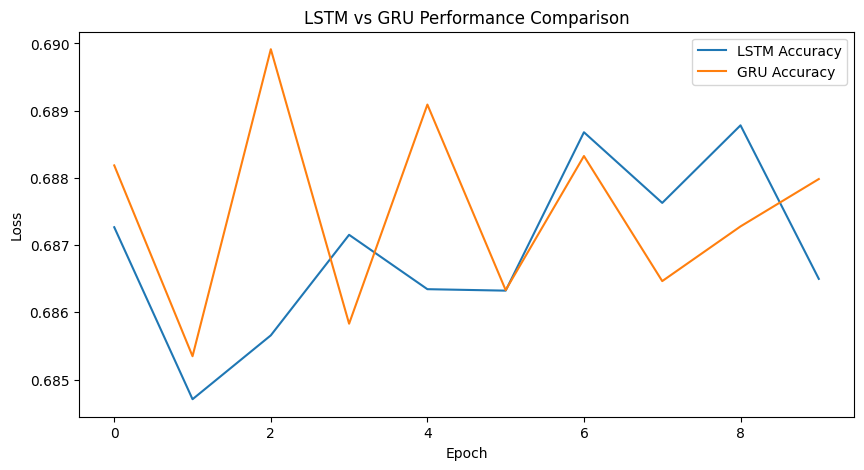

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['val_loss'], label='LSTM Accuracy')
plt.plot(history_gru.history['val_loss'], label='GRU Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("LSTM vs GRU Performance Comparison")
plt.show()

Task 4 Text Generation with LSTM

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)[0]

X, y = [], []
for i in range(1, len(sequences)):
    X.append(sequences[:i])
    y.append(sequences[i])
X = pad_sequences(X)
y = np.array


In [21]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)[0]

#prep I/O pairs
X, y = [], []
for i in range(len(sequences) - 1):
    X.append(sequences[i])
    y.append(sequences[i + 1])

X = np.array(X).reshape(-1, 1, 1)
y = np.array(y)

In [24]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv("shakespeare.txt")

with open(file_path, "r", encoding="utf-8") as file:
  text = file.read()

Saving shakespeare.txt to shakespeare.txt


In [23]:
tokenizer = Tokenizer() #tokenization
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

NameError: name 'text' is not defined

In [24]:
# Подготовка входных данных
input_sequences = []
words = text.split()
for i in range(1, len(words)):
    sequence = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([sequence])[0]
    input_sequences.append(tokenized_seq)

# Приведение всех последовательностей к одной длине
max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Разделение входных и выходных данных
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

NameError: name 'text' is not defined

In [25]:
# Task4.1: Подготовка данных для генерации текста с LSTM
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in documents:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Task4.2: Построение и обучение модели LSTM для генерации текста
model_lstm_gen = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_length - 1),
    LSTM(150, return_sequences=True),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model_lstm_gen.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_gen.fit(X, y, epochs=20, verbose=1)


Epoch 1/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - accuracy: 0.2255 - loss: 3.6364
Epoch 2/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9019 - loss: 0.6583
Epoch 3/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9472 - loss: 0.2422
Epoch 4/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9454 - loss: 0.1674
Epoch 5/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.9468 - loss: 0.1356
Epoch 6/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.9466 - loss: 0.1260
Epoch 7/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.9437 - loss: 0.1289
Epoch 8/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9448 - loss: 0.1216
Epoch 9/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.9482 - loss: 0.1165
Epoch 10/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.9170 - loss: 0.2285
Epoch 11/20
457/457 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9453 - loss: 0.1324
Epoch 12/20
457/457 ━━━━━━━━━━

Task4.3: Text generation for random words

In [38]:
def generate_text():
    random_word = random.choice(list(tokenizer.word_index.keys()))
    seed_text = random_word  # Используем слово в качестве начального текста
    print("Random Seed Word:", random_word)
    for _ in range(20):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
        predicted = np.argmax(model_lstm_gen.predict(token_list, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    print("Generated Text:", seed_text)

generate_text()

Random Seed Word: perfect
Generated Text: perfect experts experts believe that ai will revolutionize the job market memory retention retention retention retention effort economy their effort effort


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense

def build_model(cell_type="LSTM", bidirectional=False):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=100),
        Bidirectional(LSTM(32)) if bidirectional else (LSTM(32) if cell_type == "LSTM" else GRU(32)),
        # Change to Dense(125) with softmax activation
        Dense(125, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Создание моделей
bi_lstm_model = build_model("LSTM", bidirectional=True)
lstm_model = build_model("LSTM", bidirectional=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9431 - loss: 0.1216 - val_accuracy: 0.9425 - val_loss: 0.1164
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9443 - loss: 0.1165 - val_accuracy: 0.9425 - val_loss: 0.1153
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9482 - loss: 0.1160 - val_accuracy: 0.9493 - val_loss: 0.1135
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9501 - loss: 0.1095 - val_accuracy: 0.9445 - val_loss: 0.1173
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9435 - loss: 0.1159 - val_accuracy: 0.9466 - val_loss: 0.1148
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9427 - loss: 0.1225 - val_accuracy: 0.9479 - val_loss: 0.1134
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9454 - loss: 0.1169 - val_accuracy: 0.9445 - val_loss: 0.1138
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9468 - loss: 0.1123 - val_accu

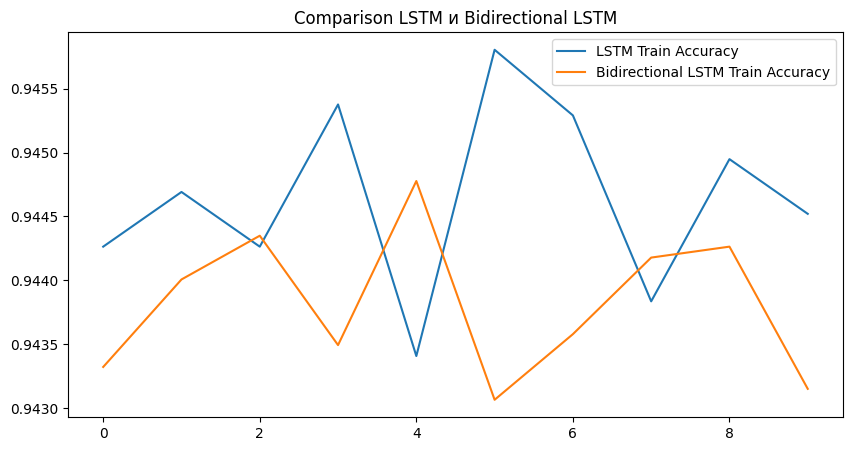

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data

def train_and_plot(model, name):
    # Changed x_train, y_train, x_test to X_train, y_train, X_test
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
    plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
    return history

# Обучение моделей
plt.figure(figsize=(10, 5))
history_lstm = train_and_plot(lstm_model, "LSTM")
bi_lstm_history = train_and_plot(bi_lstm_model, "Bidirectional LSTM")

plt.legend()
plt.title("Comparison LSTM и Bidirectional LSTM")
plt.show()

In [71]:
import random

def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        tokenized = tokenizer.texts_to_sequences([seed_text])[0]
        tokenized = pad_sequences([tokenized], maxlen=X.shape[1], padding='pre')
        predicted_index = np.argmax(model.predict(tokenized), axis=-1)[0]
        output_word = next(word for word, index in tokenizer.word_index.items() if index == predicted_index)
        seed_text += " " + output_word
    return seed_text

print(generate_text("To be"))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'